# Statistical Operations

# First : Import dataset from scikit-learn

In [2]:
#import the Breast Cancer dataset from scikit-learn
from sklearn.datasets import load_breast_cancer
# load the Breast Cancer dataset
data = load_breast_cancer ()
# print out the description of the dataset
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Second : Load dataset into a dataframe

In [3]:
import pandas as pd
#create dataframe from dataset
df = pd.DataFrame(data.data,
columns=data.feature_names)
#define a target variable.
df['target'] = data.target

# Third : do statistical operator

In [5]:
# create an interest subset of features
features = ['mean smoothness', 'mean compactness',
'mean concavity', 'mean concave points',
'mean symmetry']
#new feature with the sum of the selected variables
df['added_feature'] = df[features].sum(axis=1)
#new feature with the product of the selected features
df['prod_feature'] = df[features].prod(axis=1)

#the mean value of the selected variables
df['mean_features'] = df[features].mean(axis=1)
#the standard deviation of the selected features
df['std_features'] = df[features].std(axis=1)
#the maximum value across the selected variables:
df['max_features'] = df[features].max(axis=1)
#the minimum value across the selected features:
df['min_features'] = df[features].min(axis=1)

## Slide #9 and #10 can do with pandas’agg()


In [10]:
# create an interest subset of features
features = ['mean smoothness', 'mean compactness',
'mean concavity', 'mean concave points',
'mean symmetry']
#do the same thing in slide #9 and #10
df_t = df[features].agg(['sum','prod','mean','std','max','min'],axis='columns')

# visualization

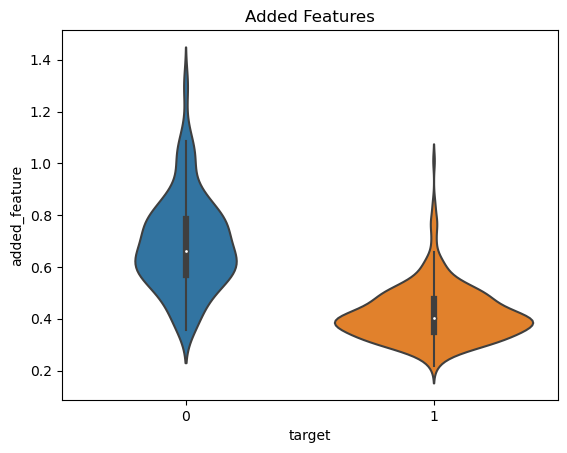

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x='target',y='added_feature',data=df)
plt.title('Added Features')
plt.show()

# Mathematical functions

# First : Import dataset from scikit-learn

In [13]:
#import the Breast Cancer dataset from scikit-learn
from sklearn.datasets import load_breast_cancer
# load the Breast Cancer dataset
data = load_breast_cancer ()
# print out the description of the dataset
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

# Second : Load dataset into a dataframe

In [14]:
import pandas as pd
#create dataframe from dataset
df = pd.DataFrame(data.data,
columns=data.feature_names)
#define a target variable.
df['target'] = data.target

# Third : do mathematical operator

In [96]:
#the difference between two features
df['diff1']=df['worst compactness'].sub(df['mean compactness'])
#the same calculation
df['diff2']=df['worst compactness']-df['mean compactness']
#the ratio between two variables
df['quotient1'] = df['worst radius'].div(df['mean radius'])
#the same calculation
df['quotient2'] = df['worst radius']/df['mean radius']

KeyError: 'worst compactness'

In [97]:
#(list1)
features = ['mean smoothness','mean compactness','mean concavity','mean concave points','mean symmetry']
#(list2)
worst_f = ['worst smoothness','worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']
#sum of the features
df['worst'] = df[worst_f].sum(axis=1)
#ratio between each one of the features in list1 and df[‘worst’]
df[features]=df[features].div(df['worst'],axis=0)

KeyError: "None of [Index(['worst smoothness', 'worst compactness', 'worst concavity',\n       'worst concave points', 'worst symmetry'],\n      dtype='object')] are in the [columns]"

# Polynomial Expansion

# First : Import dataset from scikit-learn

In [22]:
#import the Boston House Prices dataset
from sklearn.datasets import fetch_california_housing
# load the Boston House Prices dataset
data = fetch_california_housing()
# print out the description of the dataset
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

# Second : Load dataset into a dataframe

In [24]:
import pandas as pd
#create dataframe from dataset
df = pd.DataFrame(data.data,columns=data.feature_names)
#define a target variable.
dataY = data.target
dataX = df[['HouseAge', 'MedInc', 'AveRooms']]

# Third : training set vs testing set

In [25]:
from sklearn.model_selection import train_test_split
#separate the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14448, 3) (6192, 3)
(14448,) (6192,)


# Four : polynomial expansion transformer

In [94]:
from sklearn.preprocessing import PolynomialFeatures
#set up the polynomial expansion transformer
poly = PolynomialFeatures(degree=3,interaction_only=False,include_bias=False)
#fit the transformer to the train set (three variables)
poly.fit(X_train)

PolynomialFeatures(degree=3, include_bias=False)

In [95]:
#create the new polynomial features in a new dataset:
train_t=poly.transform(X_train)
test_t=poly.transform(X_test)
#examine the names of the features
poly.get_feature_names_out(['HouseAge', 'MedInc', 'AveRooms'])
#put array with the polynomial features in a dataframe
test_t=pd.DataFrame(test_t)
test_t.columns=poly.get_feature_names_out(['HouseAge', 'MedInc', 'AveRooms'])
print(test_t.shape)

(6192, 19)


# Visualization

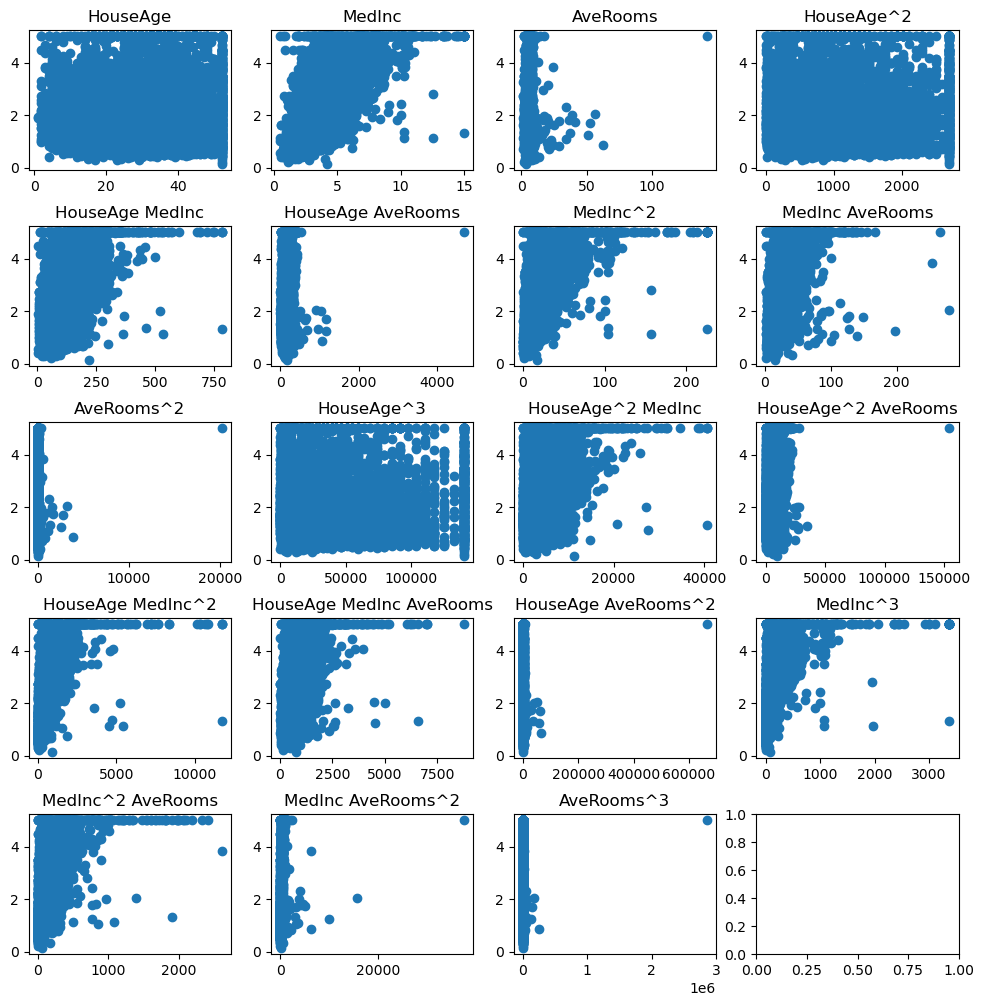

In [34]:
#imort matplotlib
import matplotlib.pyplot as plt

def plot_features(df,target):
    nb_rows = 5;
    nb_cols = 4
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12,12))
    plt.subplots_adjust(wspace=None, hspace=0.4)
    n=0
    for i in range(0,nb_rows):
        for j in range(0,nb_cols):
            if n!=19:
                axs[i,j].scatter(df[df.columns[n]],target)
                axs[i,j].set_title(df.columns[n])
            n+=1
plt.show()

# เรียกใช้ฟังก์ชัน plot_features
plot_features(test_t,y_test)

# PCA with the Iris dataset

## First : Import the module

In [35]:
#import the Iris dataset from scikit-learn
from sklearn.datasets import load_iris
#import our plotting module
import matplotlib.pyplot as plt
%matplotlib inline
# load the Iris dataset
iris = load_iris()

## Second : data matrix and response variables

In [85]:
#create X and Y variables to hold features and
#response column
# โหลดชุดข้อมูล Iris
iris = load_iris()
iris_X, iris_Y = iris.data, iris.target
# the names of the flower trying to predict.
iris.target_names
#look at the names of the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

## : set name label into number


In [86]:
#for labelling
label_dict = {i:k for i,k in enumerate(iris.target_names)}
#{0: ‘setosa’, 1: ‘versicolor’, 2: ‘virginica’}

## Third : let’s display the data-point of two features

In [91]:
def plot(X,Y,title, x_label, y_label):
    ax = plt.subplot(111)
    for label,marker,color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:,0].real[Y==label],y=X[:,1].real[Y==label], color=color,alpha=0.5, label=label_dict[label])
    plt.xlabel(x_label); 
    plt.ylabel(y_label);
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

## : call function plot

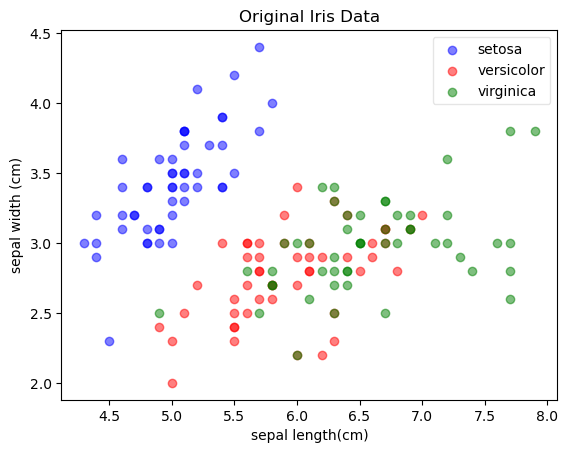

In [92]:
plot(iris_X,iris_Y, "Original Iris Data", "sepal length(cm)", "sepal width (cm)")

## PCA Manual: Covariance matrix

In [66]:
#import numpy
import numpy as np
# calculate the mean vector
mean_vector = iris_X.mean(axis=0)
print(mean_vector)
#calculate the covariance matrix
cov_mat = np.cov((iris_X - mean_vector).T)
print(cov_mat.shape)
cov_mat

[5.84333333 3.05733333 3.758      1.19933333]
(4, 4)


array([[ 0.68569351, -0.042434  ,  1.27431544,  0.51627069],
       [-0.042434  ,  0.18997942, -0.32965638, -0.12163937],
       [ 1.27431544, -0.32965638,  3.11627785,  1.2956094 ],
       [ 0.51627069, -0.12163937,  1.2956094 ,  0.58100626]])

## PCA Manual: eigenvalues of Covariance matrix

In [67]:
#calculate the eigenvectors and eigenvalues of
#our covariance matrix of the iris dataset
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

## PCA Manual: eigenvalue of cov_mat

In [72]:
#print the eigen vectors and corresponding eigenvalues
#in order of descending eigenvalues
for I in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,I]
    print ("eigen vector{}:{} with {}".format(I+1,eigvec_cov,eig_val_cov[I]))
    print (30*"-")

eigen vector1:[ 0.36138659 -0.08452251  0.85667061  0.3582892 ] with 4.228241706034865
------------------------------
eigen vector2:[-0.65658877 -0.73016143  0.17337266  0.07548102] with 0.2426707479286336
------------------------------
eigen vector3:[-0.58202985  0.59791083  0.07623608  0.54583143] with 0.07820950004291936
------------------------------
eigen vector4:[ 0.31548719 -0.3197231  -0.47983899  0.75365743] with 0.023835092973449847
------------------------------


## PCA Manual: The scree plot

In [73]:
#the percentage of the variance captured by
#each eigenvalue is equal to the eigenvalue of that
#components divided by the sum of all eigen values
variance_ratio = eig_val_cov/eig_val_cov.sum()
variance_ratio

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

## PCA Manual: The scree plot

Text(0, 0.5, '% of variance explained <= k')

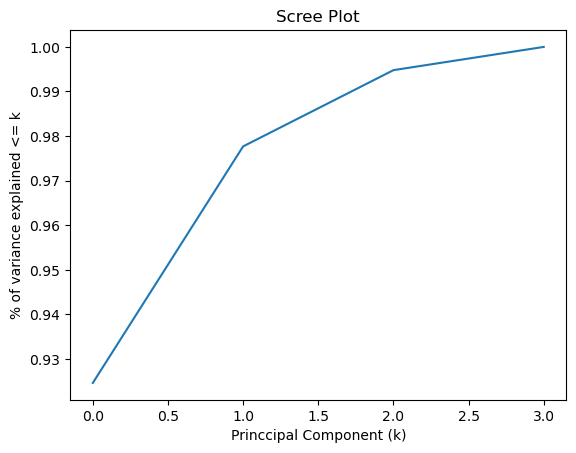

In [76]:
#Scree Plot
plt.plot(np.cumsum(variance_ratio))
plt.title('Scree Plot')
plt.xlabel('Princcipal Component (k)')
plt.ylabel('% of variance explained <= k')

## PCA Manual: Transform data points

In [78]:
#store top two eigenvectors in a variable
top_2_eigenvectors = eig_vec_cov[:,:2].T
top_2_eigenvectors

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [-0.65658877, -0.73016143,  0.17337266,  0.07548102]])

In [89]:
#Transform data from shape (150,4) to (150,2)
new_data = np.dot(iris_X, top_2_eigenvectors.T)
new_data[:5,]

array([[ 2.81823951, -5.64634982],
       [ 2.78822345, -5.14995135],
       [ 2.61337456, -5.18200315],
       [ 2.75702228, -5.0086536 ],
       [ 2.7736486 , -5.65370709]])

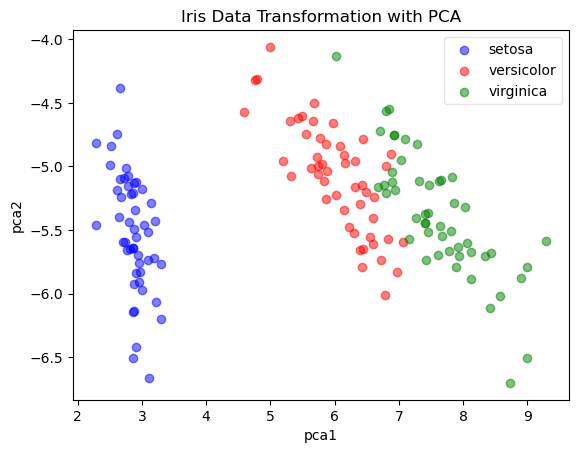

In [93]:
plot(new_data,iris_Y, "Iris Data Transformation with PCA", 'pca1', 'pca2')